<a href="https://colab.research.google.com/github/artemmiyy/psu_quants/blob/main/Alpha_Beta(23_02_2023).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import datetime 
from pandas_datareader import data as pdr 
import yfinance as yf 
yf.pdr_override()


In [ ]:
applestock = pdr.get_data_yahoo("AAPL", start = "2008-09-01", end = "2023-2-22")
spystock = pdr.get_data_yahoo("SPY", start = "2008-09-01", end = "2023-2-22")

applepc= applestock.Close.pct_change()[1:]
spypc = spystock.Close.pct_change()[1:]

print(applepc)
print(spypc)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Date
2008-09-03    0.004633
2008-09-04   -0.034379
2008-09-05   -0.006451
2008-09-08   -0.014109
2008-09-09   -0.039514
                ...   
2023-02-14   -0.004225
2023-02-15    0.013903
2023-02-16   -0.010429
2023-02-17   -0.007547
2023-02-21   -0.026680
Name: Close, Length: 3642, dtype: float64
Date
2008-09-03   -0.000859
2008-09-04   -0.030106
2008-09-05    0.003144
2008-09-08    0.020656
2008-09-09   -0.029687
                ...   
2023-02-14   -0.000460
2023-02-15    0.003247
2023-02-16   -0.013769
2023-02-17   -0.002498
2023-02-21   -0.020061
Name: Close, Length: 3642, dtype: float64


<AxesSubplot:xlabel='Date'>

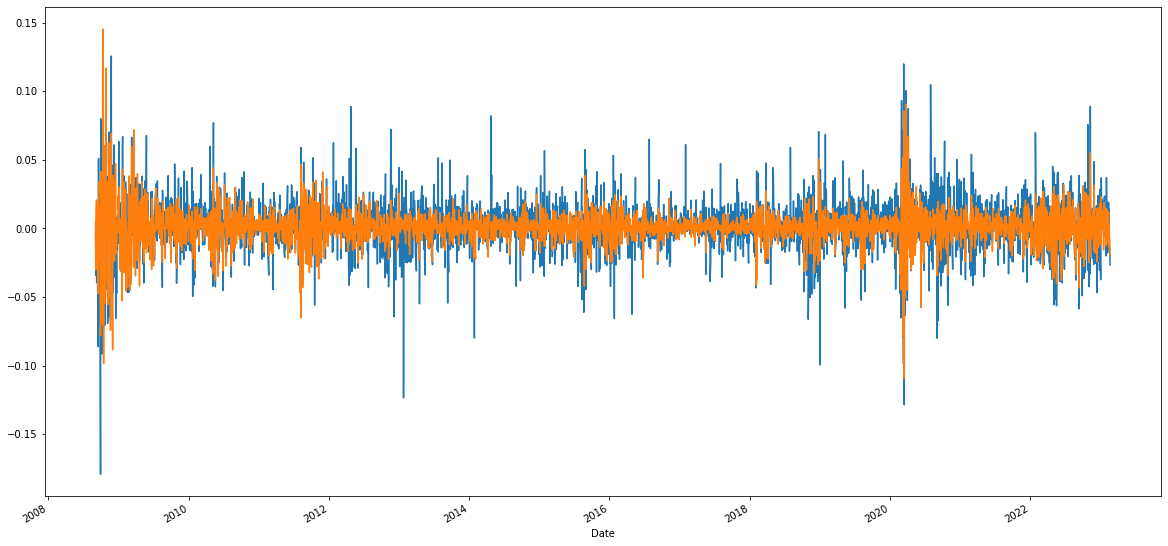

In [ ]:
plt.figure(figsize = (20,10))
applepc.plot()
spypc.plot()

In [ ]:
import statsmodels.api as sm
from statsmodels import regression
x = spypc.values
y = applepc.values

def betacalc(x,y):
  x = sm.add_constant(x)
  chart = regression.linear_model.OLS(y,x).fit()
  x = x[:, 1]
  return chart.params[0], chart.params[1]

alpha,beta = betacalc(x,y)
print(alpha)
print(beta)
rm = spypc[1:].mean()*252
rf = .0388
def capm(rf, beta, rm):
    capmvalue = rf + (beta *(rm -rf))
    return capmvalue

print(capm(rf, beta, rm))
  




0.0006626115465725982
1.0460904305785113
0.10325269799568972
